In [86]:
import pandas as pd
!pip install catboost
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import catboost
from sklearn.metrics import recall_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
df = pd.read_csv('train_dataset_train.csv', nrows=100000)
df

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,7CAE7AE97A4A86C6CAD7658BECD417A3,Социальная карта москвича,386,Нагорная,9010,Нагорная,9,Серпуховско-Тимирязевская,2022-09-12 09:01:31,670.483333,1015
99996,99997,A3E49F5C9B42FBA60C5333CBFF3CE04E,СК учащегося 30 дней,300,Рязанский проспект (Восточный),7016,Рязанский проспект,7,Таганско-Краснопресненская,2022-09-12 09:01:31,537.316667,7015
99997,99998,6A316D059D8E67C83165DAD07D6D4B18,30 дней,109,Войковская ( Северный ),2006,Войковская,2,Замоскворецкая,2022-09-12 09:01:31,707.716667,6008
99998,99999,116262B31A4C71884EAC142CEA331E3B,90 дней ЕДИНЫЙ ТК,276,Новые Черёмушки (Южный),6013,Новые Черёмушки,6,Калужско-Рижская,2022-09-12 09:01:31,566.066667,8008


In [88]:
df[df.isna()==True].count()

id                0
ticket_id         0
ticket_type_nm    0
entrance_id       0
entrance_nm       0
station_id        0
station_nm        0
line_id           0
line_nm           0
pass_dttm         0
time_to_under     0
label             0
dtype: int64

In [89]:
cols = df.columns
for col in cols:
    print(f"Характеристика: {col}")
    print(f"Количество значений: {df[col].nunique()}")
   

Характеристика: id
Количество значений: 100000
Характеристика: ticket_id
Количество значений: 100000
Характеристика: ticket_type_nm
Количество значений: 54
Характеристика: entrance_id
Количество значений: 419
Характеристика: entrance_nm
Количество значений: 419
Характеристика: station_id
Количество значений: 272
Характеристика: station_nm
Количество значений: 241
Характеристика: line_id
Количество значений: 16
Характеристика: line_nm
Количество значений: 16
Характеристика: pass_dttm
Количество значений: 12625
Характеристика: time_to_under
Количество значений: 34166
Характеристика: label
Количество значений: 274


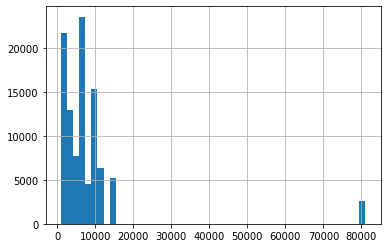

In [90]:
df["label"].hist(bins = 50)

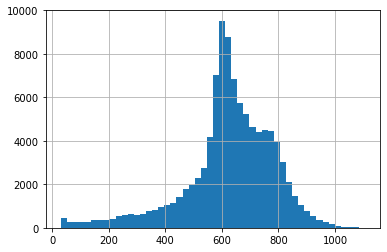

In [91]:
df["time_to_under"].hist(bins = 50)

In [92]:
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,Пропуск FacePay,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,СК учащегося 30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,БСК дружинника г.Москвы,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,30 дней,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,КОШЕЛЕК,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [93]:
df["ticket_type_nm"] = pd.Categorical(df["ticket_type_nm"])
df["ticket_type_nm"].astype('category').cat.codes
df["ticket_type_nm"] = df["ticket_type_nm"].cat.codes

In [94]:
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,36,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,47,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,25,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,3,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,34,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [95]:
df.ticket_type_nm.nunique()

54

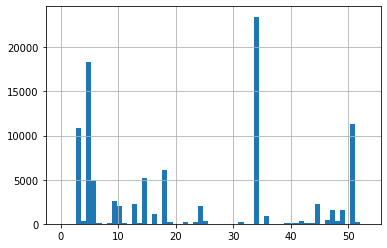

In [96]:
df.ticket_type_nm.hist(bins=60)

In [97]:
df.head()

,id,ticket_id,ticket_type_nm,entrance_id,entrance_nm,station_id,station_nm,line_id,line_nm,pass_dttm,time_to_under,label
0,1,40BD89EC85646EFB69E283F39C298E60,36,2402,Лефортово БКЛ,11007,Лефортово,11,Большая кольцевая,2022-09-12 05:00:13,216.316667,8001
1,2,126727A96489CC976A8C08E5CEB00542,47,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:54,648.183333,9011
2,3,D28CE6A9E0E5B6D213470A97CFF32485,25,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:00:55,865.333333,7022
3,4,015DA44B523C062B5BFEFF3FB0E64B9E,3,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:01:13,1048.233333,2022
4,5,95B19C6F3A504727AC3EA56EB7E3E80F,34,110,Войковская ( Южный ),2006,Войковская,2,Замоскворецкая,2022-09-12 05:02:55,965.600000,2017


In [98]:
df = pd.get_dummies(df, prefix = 'ticket_type', columns = ['ticket_type_nm'])
df = pd.get_dummies(df, prefix = 'station', columns = ['station_id'])

df['pass_dttm'] = pd.to_datetime(df['pass_dttm'])
df['hour'] = df['pass_dttm'].dt.hour

df['time_of_day'] = df['hour'].apply(
    lambda hour: 'AM' if hour>=0 and hour<=7 else 'PM' )

df = df.drop(columns = 'pass_dttm')

df = pd.get_dummies(df, prefix = 'time_of_day', columns = ['time_of_day'])



In [99]:
categorical_features = ['ticket_type_nm', 'entrance_id', 'station_id', 'line_id', 'label']

X = df.drop(columns=['time_to_under', 'label', 'ticket_id', 'entrance_nm', 'station_nm' , 'line_nm','hour'])
y = df['time_to_under']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X                                                   


,id,entrance_id,line_id,ticket_type_0,ticket_type_1,ticket_type_2,ticket_type_3,ticket_type_4,ticket_type_5,ticket_type_6,...,station_81006,station_81010,station_81011,station_81012,station_81013,station_81014,station_81015,station_81016,time_of_day_AM,time_of_day_PM
0,1,2402,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,110,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,110,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,110,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,110,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,386,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99996,99997,300,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99997,99998,109,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99998,99999,276,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [100]:
clf = catboost.CatBoostRegressor()
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

r2 = r2_score(y_test, y_predict)
r2

Learning rate set to 0.080113
0:	learn: 156.8962402	total: 18ms	remaining: 18s
1:	learn: 155.4280538	total: 31ms	remaining: 15.5s
2:	learn: 154.2150933	total: 42.6ms	remaining: 14.2s
3:	learn: 153.2867815	total: 53.6ms	remaining: 13.4s
4:	learn: 152.2317607	total: 64.5ms	remaining: 12.8s
5:	learn: 151.2851986	total: 76.2ms	remaining: 12.6s
6:	learn: 150.6142251	total: 87.3ms	remaining: 12.4s
7:	learn: 149.9319165	total: 97.8ms	remaining: 12.1s
8:	learn: 149.2700413	total: 113ms	remaining: 12.4s
9:	learn: 148.7256106	total: 123ms	remaining: 12.2s
10:	learn: 148.2525637	total: 135ms	remaining: 12.1s
11:	learn: 147.8334084	total: 146ms	remaining: 12s
12:	learn: 147.4219280	total: 157ms	remaining: 11.9s
13:	learn: 147.0597719	total: 169ms	remaining: 11.9s
14:	learn: 146.7393271	total: 181ms	remaining: 11.9s
15:	learn: 146.4818992	total: 192ms	remaining: 11.8s
16:	learn: 146.2466442	total: 203ms	remaining: 11.7s
17:	learn: 146.0373170	total: 214ms	remaining: 11.7s
18:	learn: 145.8605610	tot

0.19078809868166524

In [101]:
X = df.drop(columns=['time_to_under', 'label', 'ticket_id', 'entrance_nm', 'station_nm' , 'line_nm','hour'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
                                                    
clf = RandomForestClassifier(n_estimators = 30)
clf.fit(X_train, y_train)

y_predict = clf.predict(X_test)

In [102]:
recall = recall_score(y_test, y_predict, average='macro')
recall

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.04572617876165454

In [103]:
score = 0.5*(recall+r2)
score

0.11825713872165988